In [1]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [2]:
!kaggle datasets download -d muratkokludataset/grapevine-leaves-image-dataset

grapevine-leaves-image-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!unzip /content/grapevine-leaves-image-dataset.zip

Archive:  /content/grapevine-leaves-image-dataset.zip
replace Grapevine_Leaves_Image_Dataset/Ak/Ak (1).png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
# Load data
data_path = "/content/Grapevine_Leaves_Image_Dataset"
batch_size = 32
image_size = (256, 256)

In [7]:
data_train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
)
data_valid_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
)
data_test_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
)

In [8]:
train_data = data_train_gen.flow_from_directory(directory=data_path,
                                      target_size=image_size,
                                      class_mode='categorical',
                                      shuffle=True,
                                      batch_size=batch_size)

test_data = data_test_gen.flow_from_directory(directory=data_path,
                                      target_size=image_size,
                                      class_mode='categorical',
                                      shuffle=True,
                                      batch_size=batch_size)
valid_data = data_valid_gen.flow_from_directory(directory=data_path,
                                      target_size=image_size,
                                      class_mode='categorical',
                                      shuffle=True,
                                      batch_size=batch_size)

Found 500 images belonging to 5 classes.
Found 500 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


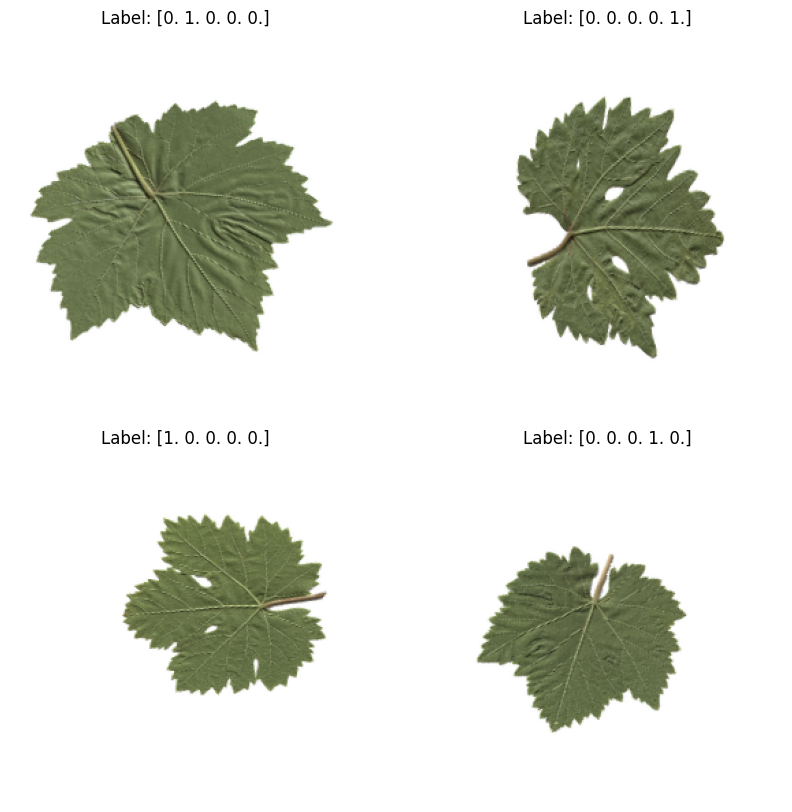

In [9]:
images, labels = next(train_data)
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i])
    plt.title(f'Label: {labels[i]}')
    plt.axis('off')
plt.show()

In [27]:
# Train CNN

In [42]:
model = keras.Sequential([
    keras.layers.Conv2D(64, kernel_size=3, input_shape=(256, 256, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(64, kernel_size=3),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(128, kernel_size=3),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(256, kernel_size=3),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(64),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(5, activation="softmax")
])

In [43]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 254, 254, 64)      1792      
                                                                 
 batch_normalization_39 (Ba  (None, 254, 254, 64)      256       
 tchNormalization)                                               
                                                                 
 activation_39 (Activation)  (None, 254, 254, 64)      0         
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 127, 127, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_31 (Conv2D)          (None, 125, 125, 64)      36928     
                                                                 
 batch_normalization_40 (Ba  (None, 125, 125, 64)     

In [44]:
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=2)

In [45]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [46]:
history = model.fit(train_data, epochs=10, validation_data=valid_data, callbacks=[early_stopping], batch_size=batch_size)

Epoch 1/10
16/16 [==============================] - 25s 1s/step - loss: 1.9128 - accuracy: 0.2680 - val_loss: 1.6588 - val_accuracy: 0.1760
Epoch 2/10
16/16 [==============================] - 31s 2s/step - loss: 1.6048 - accuracy: 0.3100 - val_loss: 2.1897 - val_accuracy: 0.2000
Epoch 3/10
16/16 [==============================] - 26s 2s/step - loss: 1.4558 - accuracy: 0.3920 - val_loss: 2.4628 - val_accuracy: 0.2000


In [47]:
model.evaluate(test_data)

16/16 [==============================] - 12s 729ms/step - loss: 2.4550 - accuracy: 0.2000


[2.4550180435180664, 0.20000000298023224]

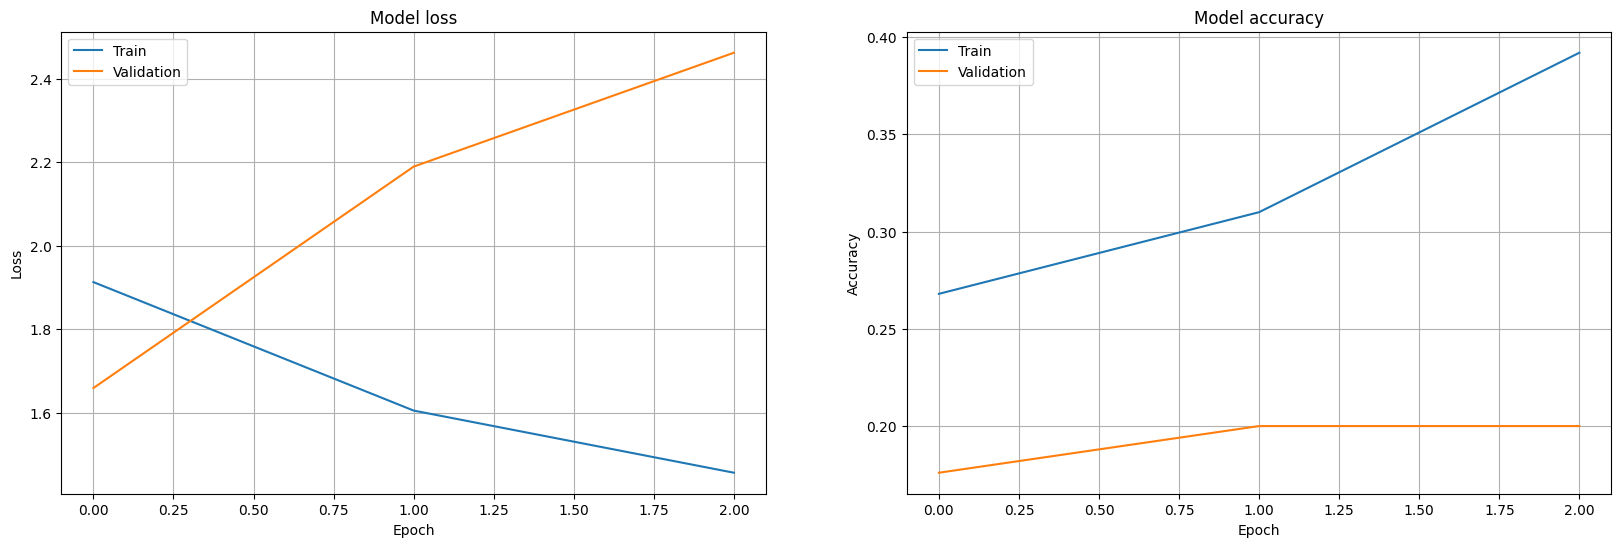

In [48]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

ax[0].plot(history.history['loss'], label='Train')
ax[0].plot(history.history['val_loss'], label='Validation')
ax[0].set_title('Model loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend(loc='upper left')
ax[0].grid(True)

ax[1].plot(history.history['accuracy'], label='Train')
ax[1].plot(history.history['val_accuracy'], label='Validation')
ax[1].set_title('Model accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend(loc='upper left')
ax[1].grid(True)
plt.show()

In [56]:
conv_base = keras.applications.vgg16.VGG16(weights="imagenet",include_top=False,input_shape=(256, 256, 3))

In [57]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [58]:
conv_base.trainable = False

In [59]:
model = keras.Sequential()
model.add(conv_base)
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(5, activation='softmax'))

In [60]:
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=2)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [61]:
history = model.fit(train_data, epochs=10, validation_data=valid_data, callbacks=[early_stopping], batch_size=batch_size)

Epoch 1/10
16/16 [==============================] - 28s 2s/step - loss: 4.3851 - accuracy: 0.2260 - val_loss: 1.5357 - val_accuracy: 0.3820
Epoch 2/10
16/16 [==============================] - 24s 2s/step - loss: 1.5470 - accuracy: 0.2980 - val_loss: 1.4048 - val_accuracy: 0.4420
Epoch 3/10
16/16 [==============================] - 23s 1s/step - loss: 1.4582 - accuracy: 0.3620 - val_loss: 1.2752 - val_accuracy: 0.5160
Epoch 4/10
16/16 [==============================] - 26s 2s/step - loss: 1.4473 - accuracy: 0.3580 - val_loss: 1.2052 - val_accuracy: 0.4920
Epoch 5/10
16/16 [==============================] - 21s 1s/step - loss: 1.3715 - accuracy: 0.3960 - val_loss: 1.1674 - val_accuracy: 0.6200
Epoch 6/10
16/16 [==============================] - 23s 1s/step - loss: 1.3411 - accuracy: 0.4300 - val_loss: 1.1408 - val_accuracy: 0.6060
Epoch 7/10
16/16 [==============================] - 22s 1s/step - loss: 1.3218 - accuracy: 0.4440 - val_loss: 1.0868 - val_accuracy: 0.6320
Epoch 8/10
16/16 [==

In [62]:
model.evaluate(test_data)

16/16 [==============================] - 11s 681ms/step - loss: 1.2113 - accuracy: 0.5940


[1.2112634181976318, 0.593999981880188]

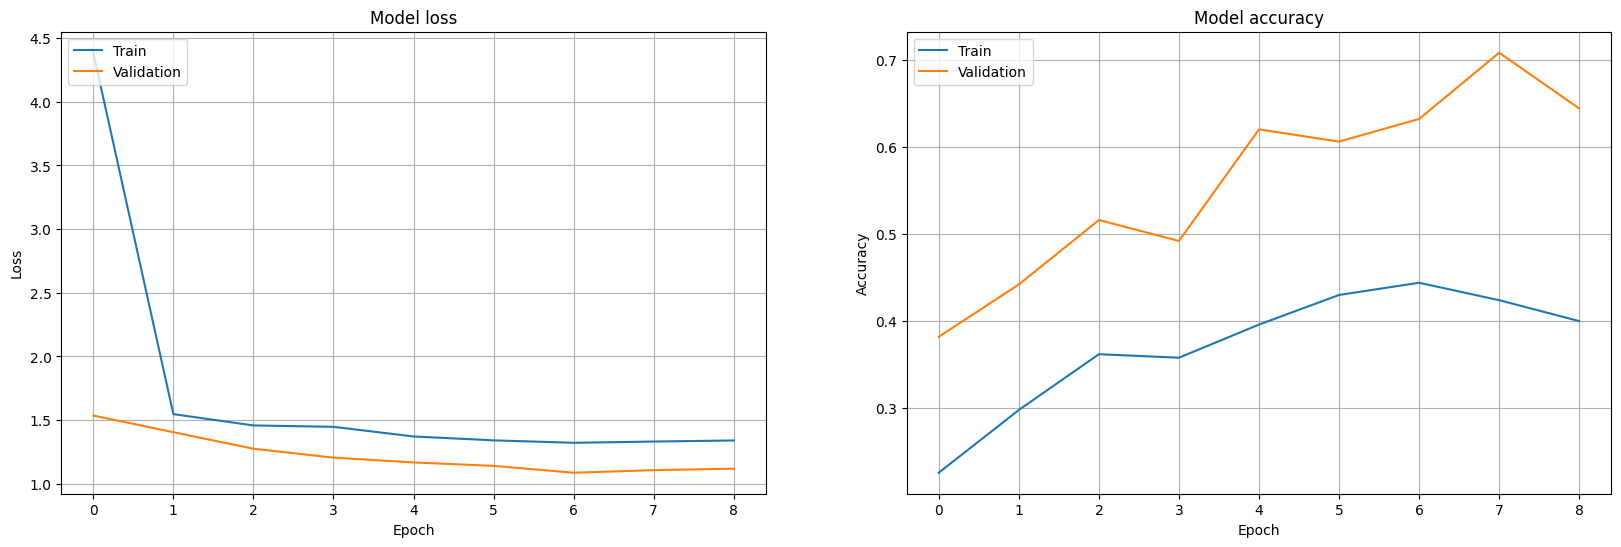

In [63]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

ax[0].plot(history.history['loss'], label='Train')
ax[0].plot(history.history['val_loss'], label='Validation')
ax[0].set_title('Model loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend(loc='upper left')
ax[0].grid(True)

ax[1].plot(history.history['accuracy'], label='Train')
ax[1].plot(history.history['val_accuracy'], label='Validation')
ax[1].set_title('Model accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend(loc='upper left')
ax[1].grid(True)
plt.show()

In [64]:
incept = keras.applications.InceptionV3(weights='imagenet', include_top=False,  input_shape=(256, 256, 3))

87910968/87910968 [==============================] - 5s 0us/step


In [68]:
incept.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_34 (Conv2D)          (None, 127, 127, 32)         864       ['input_4[0][0]']             
                                                                                                  
 batch_normalization_44 (Ba  (None, 127, 127, 32)         96        ['conv2d_34[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_44 (Activation)  (None, 127, 127, 32)         0         ['batch_normalizati

In [69]:
incept.trainable = False

In [70]:
model = keras.Sequential()
model.add(incept)
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(5, activation='softmax'))

In [71]:
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=2)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [72]:
history = model.fit(train_data, epochs=30, validation_data=valid_data, callbacks=[early_stopping], batch_size=batch_size)

Epoch 1/30
16/16 [==============================] - 32s 2s/step - loss: 22.7269 - accuracy: 0.2860 - val_loss: 2.9104 - val_accuracy: 0.5320
Epoch 2/30
16/16 [==============================] - 21s 1s/step - loss: 3.0387 - accuracy: 0.3540 - val_loss: 1.3803 - val_accuracy: 0.4300
Epoch 3/30
16/16 [==============================] - 21s 1s/step - loss: 1.4151 - accuracy: 0.3540 - val_loss: 1.2258 - val_accuracy: 0.5520
Epoch 4/30
16/16 [==============================] - 21s 1s/step - loss: 1.4840 - accuracy: 0.3500 - val_loss: 1.1985 - val_accuracy: 0.6160
Epoch 5/30
16/16 [==============================] - 21s 1s/step - loss: 1.4368 - accuracy: 0.3760 - val_loss: 1.2037 - val_accuracy: 0.5640
Epoch 6/30
16/16 [==============================] - 20s 1s/step - loss: 1.3943 - accuracy: 0.4180 - val_loss: 1.1123 - val_accuracy: 0.6220
Epoch 7/30
16/16 [==============================] - 21s 1s/step - loss: 1.3478 - accuracy: 0.4040 - val_loss: 1.2069 - val_accuracy: 0.5520
Epoch 8/30
16/16 [=

In [73]:
model.evaluate(test_data)

16/16 [==============================] - 10s 619ms/step - loss: 1.3084 - accuracy: 0.4560


[1.3084286451339722, 0.4560000002384186]

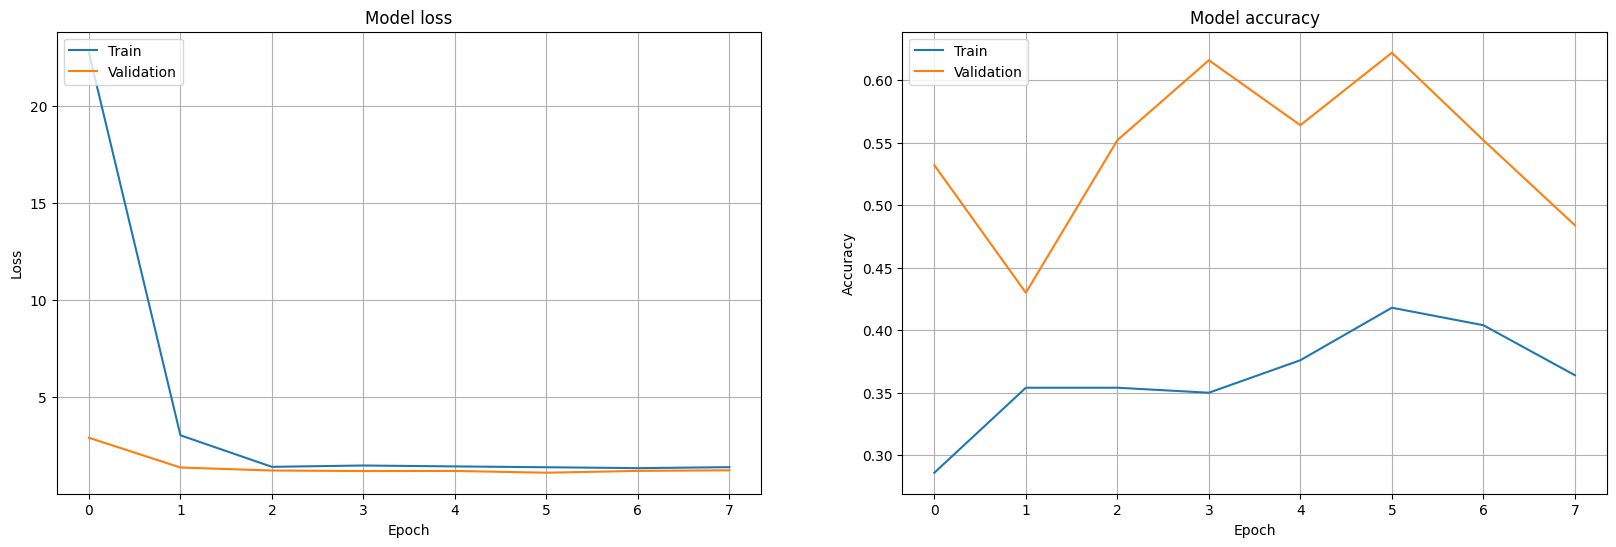

In [74]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

ax[0].plot(history.history['loss'], label='Train')
ax[0].plot(history.history['val_loss'], label='Validation')
ax[0].set_title('Model loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend(loc='upper left')
ax[0].grid(True)

ax[1].plot(history.history['accuracy'], label='Train')
ax[1].plot(history.history['val_accuracy'], label='Validation')
ax[1].set_title('Model accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend(loc='upper left')
ax[1].grid(True)
plt.show()